<a href="https://colab.research.google.com/github/cgarciav/base-de-datos-HCC/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#%load_ext tensorboard    Carga de Tensorboard (opcional)
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf #libreria de google que permite hacer deeplearning
from tensorflow import keras #libreria de alto nivel
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
path='/content/drive/My Drive/analisis de datos/hcc-data-complete-balanced.csv'
df=pd.read_csv(path)

In [4]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137,15.0,0,1,1,1.53,95.0,13.7,106.6,4.9,99.00,3.40,2.10,34,41,183,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,0.0,0,1,1,1.24,2.6,10.3,83.0,6.1,1.71,3.90,0.80,11,28,77,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50.0,2,1,2,0.96,5.8,8.9,79.8,8.4,472.00,3.30,0.40,58,68,202,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30.0,0,1,1,0.95,2440.0,13.4,97.1,9.0,279.00,3.70,0.40,16,64,94,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30.0,0,1,1,0.94,49.0,14.3,95.1,6.4,199.00,4.10,0.70,147,306,173,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,70,17,7.0,0,1,1,1.33,502.6,11.1,102.8,6.9,90846.80,3.18,2.67,102,126,389,117,7.0,5.25,2,8.8,1.35,73.3,46.0,873.0,0
200,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,80,107,13.0,3,2,2,1.35,2353.7,12.2,95.2,6.7,332033.67,3.26,1.07,24,56,229,231,6.5,0.78,2,7.6,1.04,69.3,23.0,70.0,0
201,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,80,86,0.0,3,1,1,1.55,23.4,10.2,96.3,7.4,195.76,2.93,3.22,66,68,469,304,7.0,1.07,1,12.0,1.57,71.2,29.0,106.0,0
202,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,74,124,0.0,3,2,1,1.33,6.1,13.0,86.0,1118.4,101884.41,3.31,1.45,29,48,203,197,7.2,1.08,5,3.0,0.63,94.4,83.0,859.0,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [0]:
x = df.drop(['Class'], axis=1) 
y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2, random_state=42)

In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)

x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)


**Modelo basado en una Máquina de Vectores Soporte sobre el espacio original**

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_auc_score


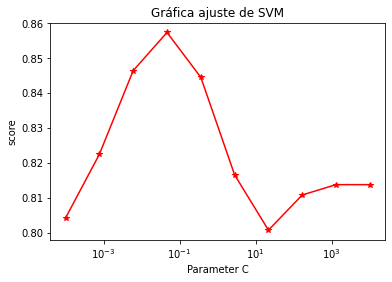

0.046415888336127774

In [9]:
c_values=np.logspace(-4,4, 10)
cv_c_scores=[]


for k in c_values:

    clf = svm.LinearSVC(C=k, max_iter=1000000)
    scores = cross_val_score(clf, x_train_transformed, y_train, cv=10 , scoring='roc_auc') #aplicamos cross validation
    cv_c_scores.append(scores.mean())
    

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()

plt.semilogx(c_values,cv_c_scores,color='r' , marker='*' , label='cv')
#locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('score')
plt.xlabel('Parameter C')
plt.title('Gráfica ajuste de SVM')
plt.show()


#select the maximum because we are considering accuracy
c_opt=(np.array(c_values)[cv_c_scores.index(np.array(cv_c_scores).max())])
c_opt
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [0]:
#entrenamos nuestro modelo
clf = svm.LinearSVC(C=c_opt).fit(x_train_transformed,y_train)

In [11]:
from sklearn.metrics import classification_report

y_pred=clf.predict(x_test_transformed)
prestations=classification_report(y_test,y_pred)
print(prestations)

print('score:', clf.score(x_test_transformed, y_test))
print ('AUC:', roc_auc_score(y_test,y_pred))

print('\n \n Matriz de confusion: ')
matriz= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matriz

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.79      0.75      0.77        20

    accuracy                           0.78        41
   macro avg       0.78      0.78      0.78        41
weighted avg       0.78      0.78      0.78        41

score: 0.7804878048780488
AUC: 0.7797619047619048

 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,17,4,21
1,5,15,20
All,22,19,41


SELECCIÓN DE CARACTERÍSTICAS

In [12]:
coef= clf.coef_
print(coef)

[[ 4.72665820e-02 -2.28879526e-01  3.05165334e-02  1.56251028e-01
  -1.26113356e-03 -5.08241436e-02 -2.58855504e-02  8.38690753e-05
   1.77277315e-01  1.84941006e-01 -2.63197594e-01  5.53636604e-02
   1.03985745e-01  3.47419531e-01 -9.26060816e-02 -1.27813738e-01
   2.44594337e-01 -1.00894263e-01  9.96509931e-02  5.67775384e-02
  -1.97660588e-01 -1.11219246e-01  1.24429899e-01 -1.67331284e-01
   2.43642320e-02 -2.15450208e-01 -1.60482492e-01  4.45344632e-02
  -1.37014685e-01 -2.66146873e-01  1.11994583e-01  9.04077125e-02
   5.92895202e-02 -1.02680900e-01 -5.68800499e-02 -4.30332100e-02
  -6.60853015e-02  1.56154817e-01 -2.59228673e-01 -2.79613051e-02
  -1.69350492e-01 -7.71935412e-02  1.20180448e-02 -8.33504433e-02
  -2.32317646e-01 -3.29218837e-02  2.02934435e-02 -1.18148926e-01
  -3.48755844e-01]]


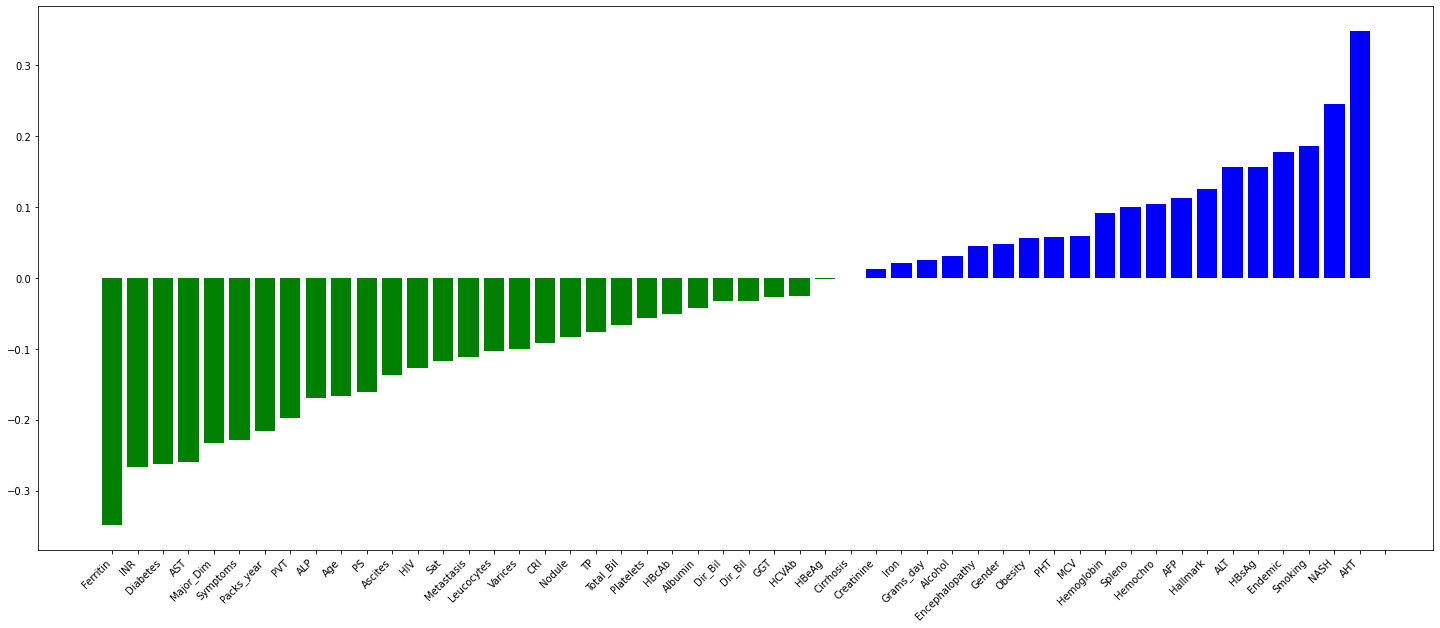

In [13]:
from sklearn import svm

def feature_plot(classifier, feature_names, top_features=25):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(25,10))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

#print(df.drop(['Class'], axis = 1).columns.values)

clf = svm.LinearSVC(C=c_opt).fit(x_train_transformed,y_train)
feature_plot(clf, df.drop(['Class'], axis = 1).columns.values)

 TRABAJAMOS CON MODELO SVM NO LINEAL PARA EL CONJUNTO DE TODAS LAS CARACTERÍSTICAS




In [0]:
#probamos a trabajar con un svm no lineal 
from sklearn.svm import SVC

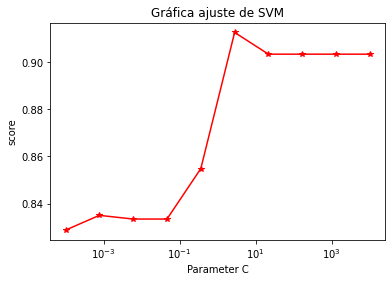

2.782559402207126

In [15]:
c_values=np.logspace(-4,4, 10)
cv_c_scores=[]


for k in c_values:

    clf=SVC(kernel='rbf',C=k ,gamma='scale')
    scores = cross_val_score(clf, x_train_transformed, y_train, cv=10 , scoring='roc_auc') #aplicamos cross validation
    cv_c_scores.append(scores.mean())
    


  
# Do the plotting
import matplotlib.pyplot as plt
plt.figure()

plt.semilogx(c_values,cv_c_scores,color='r' , marker='*' , label='cv')
#locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('score')
plt.xlabel('Parameter C')
plt.title('Gráfica ajuste de SVM')
plt.show()


#select the maximum because we are considering accuracy
c_opt=(np.array(c_values)[cv_c_scores.index(np.array(cv_c_scores).max())])
c_opt
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [17]:
sigmakernel1=SVC(kernel='rbf',C=c_opt,gamma='scale')
sigmakernel1.fit(x_train_transformed,np.ravel(y_train))

y_pred=sigmakernel1.predict(x_test_transformed)
matriz=confusion_matrix(y_test,y_pred)

print ('AUC:', roc_auc_score(y_test,y_pred))


AUC: 0.8511904761904762


TRABAJO CON CARACTERÍSTICAS SELECCIONADAS

In [0]:
x2=df[['ALP','Albumin','Ferritin','Age','Iron','Alcohol','Creatinine','Encephalopathy','Grams_day','Obesity','Gender','MCV','PHT','Hemoglobin','Spleno','AFP','Hemochro','Hallmark','Endemic','Smoking','HBsAg','ALT','NASH','AHT' ]]
#x2 = df[['Iron','Alcohol','Creatinine','Encephalopathy','Grams_day','Obesity','Gender','MCV','PHT','Hemoglobin','Spleno','AFP','Hemochro','Hallmark','Endemic','Smoking','HBsAg','ALT','NASH','AHT']] 
y2=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x2, y2,stratify=y, test_size=0.2, random_state=42)


In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)

x_train_transf=scaler.transform(x_train)
x_test_transf=scaler.transform(x_test)


TRABAJAMOS CON MODELO SVM LINEAL

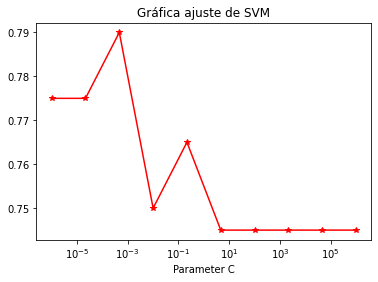

0.00046415888336127773

In [46]:

c_values=np.logspace(-6,6, 10)
cv_c_scores=[]


for k in c_values:

    clf = svm.LinearSVC(C=k,dual=False, max_iter= 10000)
    scores = cross_val_score(clf, x_train_transf, y_train, cv=50 ,scoring='roc_auc') #aplicamos cross validation
    cv_c_scores.append(scores.mean())


  
# Do the plotting
import matplotlib.pyplot as plt
plt.figure()

plt.semilogx(c_values,cv_c_scores,color='r' , marker='*' , label='cv')
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
#plt.ylabel('accuracy')
plt.xlabel('Parameter C')
plt.title('Gráfica ajuste de SVM')
plt.show()


#select the maximum because we are considering accuracy
c_opt2=(np.array(c_values)[cv_c_scores.index(np.array(cv_c_scores).max())])
c_opt2
#obtengo valor maximo que tengo que usar para mi clasificador(k)   

In [0]:
clf = svm.LinearSVC(C=c_opt2).fit(x_train_transf,y_train)


In [48]:
from sklearn.metrics import classification_report

y_pred=clf.predict(x_test_transf)
prestations=classification_report(y_test,y_pred)
print(prestations)

print('score:', clf.score(x_test_transf, y_test))
print ('AUC:', roc_auc_score(y_test,y_pred))

print('\n \n Matriz de confusion: ')
matriz= pd.crosstab(y_test,y_pred,rownames=['Real'], colnames=['Predicted'], margins= True)
matriz

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.79      0.75      0.77        20

    accuracy                           0.78        41
   macro avg       0.78      0.78      0.78        41
weighted avg       0.78      0.78      0.78        41

score: 0.7804878048780488
AUC: 0.7797619047619048

 
 Matriz de confusion: 


Predicted,0,1,All
Real,,,
0,17,4,21
1,5,15,20
All,22,19,41


In [0]:
#probamos a trabajar con un SVM no lineal 

In [0]:
x2=df[['ALP','Albumin','Ferritin', 'Age', 'Iron','Alcohol','Creatinine','Encephalopathy','Grams_day','Obesity','Gender','MCV','PHT','Hemoglobin','Spleno','AFP','Hemochro','Hallmark','Endemic','Smoking','HBsAg','ALT','NASH','AHT' ]]
#x2 = df[['Iron','Alcohol','Creatinine','Encephalopathy','Grams_day','Obesity','Gender','MCV','PHT','Hemoglobin','Spleno','AFP','Hemochro','Hallmark','Endemic','Smoking','HBsAg','ALT','NASH','AHT']] 
y2=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x2, y2,stratify=y, test_size=0.2, random_state=42)

In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)

x_train_transf=scaler.transform(x_train)
x_test_transf=scaler.transform(x_test)

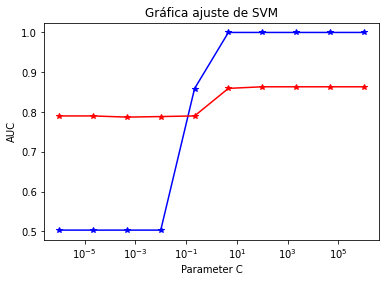

100.0

In [37]:
c_values=np.logspace(-6,6, 10)
cv_c_scores=[]


for k in c_values:

    clf=SVC(kernel='rbf',C=k ,gamma='scale')
    scores = cross_val_score(clf, x_train_transf, y_train, cv=10 , scoring='roc_auc') #aplicamos cross validation
    cv_c_scores.append(scores.mean())
    
     
train_prec=[]
c_values2=np.logspace(-6,6, 10)

for k in c_values2 :
    
    clf=SVC(kernel='rbf',C=k,gamma='scale').fit(x_train_transf,y_train)
    train_prec.append(clf.score(x_train_transf,y_train))


  
# Do the plotting
import matplotlib.pyplot as plt
plt.figure()

plt.semilogx(c_values2,train_prec,color='b' , marker='*' , label='train')
plt.semilogx(c_values,cv_c_scores,color='r' , marker='*' , label='cv')
#locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('AUC')
plt.xlabel('Parameter C')
plt.title('Gráfica ajuste de SVM')
plt.show()


#select the maximum because we are considering accuracy
c_opt=(np.array(c_values)[cv_c_scores.index(np.array(cv_c_scores).max())])
c_opt
#obtengo valor maximo que tengo que usar para mi clasificador(k) 

In [38]:
sigmakernel1=SVC(kernel='rbf',C=c_opt,gamma='scale')
sigmakernel1.fit(x_train_transf,np.ravel(y_train))

y_pred=sigmakernel1.predict(x_test_transf)
matriz=confusion_matrix(y_test,y_pred)

print ('AUC:', roc_auc_score(y_test,y_pred))


AUC: 0.7773809523809524
score: 0.7804878048780488
